In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#Finding the null values in given dataset

data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# Above data shows no null values present in data set

In [7]:
data["Country"].value_counts().sum()

158

In [8]:
#Total 158 countries dataset available

In [10]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
# Finding top 10 happiest countries

data[["Country", "Happiness Score"]].head(10)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.406
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.286
9,Australia,7.284


In [12]:
#Switzerland having highest happiness score:-7.587 followed by Iceland & Denmark

In [13]:
# Finding last 10 happiest countries

data[["Country", "Happiness Score"]].tail(10)

,Country,Happiness Score
148,Chad,3.667
149,Guinea,3.656
150,Ivory Coast,3.655
151,Burkina Faso,3.587
152,Afghanistan,3.575
153,Rwanda,3.465
154,Benin,3.340
155,Syria,3.006
156,Burundi,2.905
157,Togo,2.839


In [14]:
#Togo having very less happiness score:2.839

In [15]:
#Finding happiness score of india
data[data["Country"]=="India"]


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [16]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [17]:
x= data[["Happiness Score",
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
y=data["Happiness Score"]

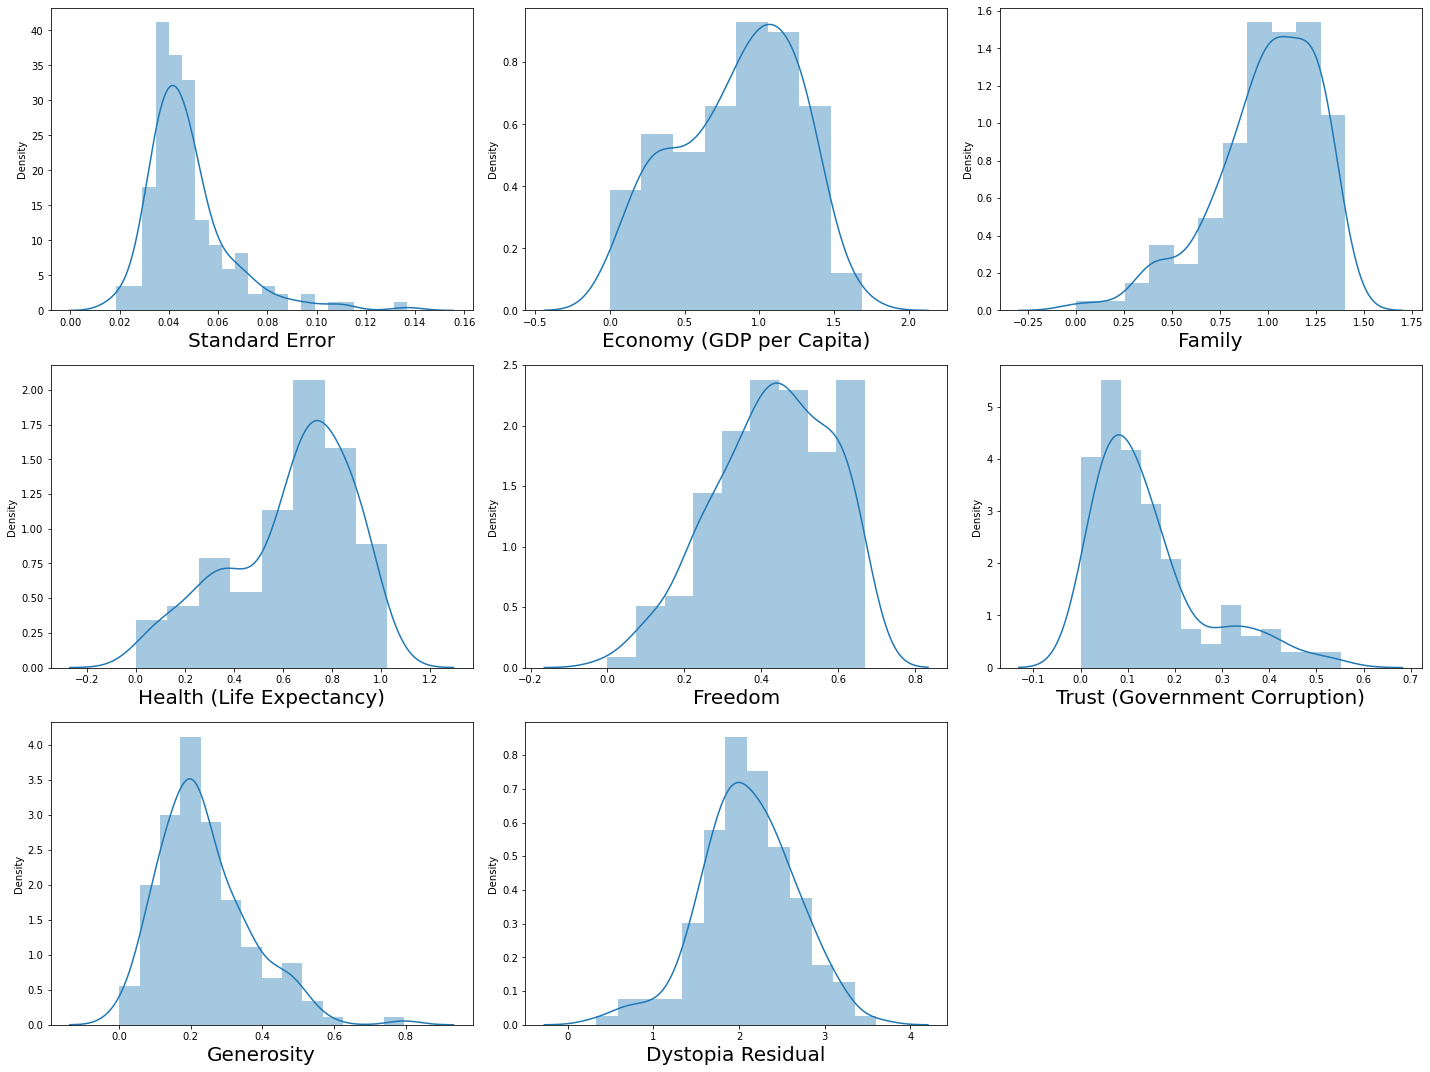

In [18]:
# Visualisation of data

plt.figure(figsize=(20,15))
plotnumber=1

for column in data[[
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]:
    if plotnumber<=10:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize =20 )
        
    plotnumber+=1
    
plt.tight_layout()


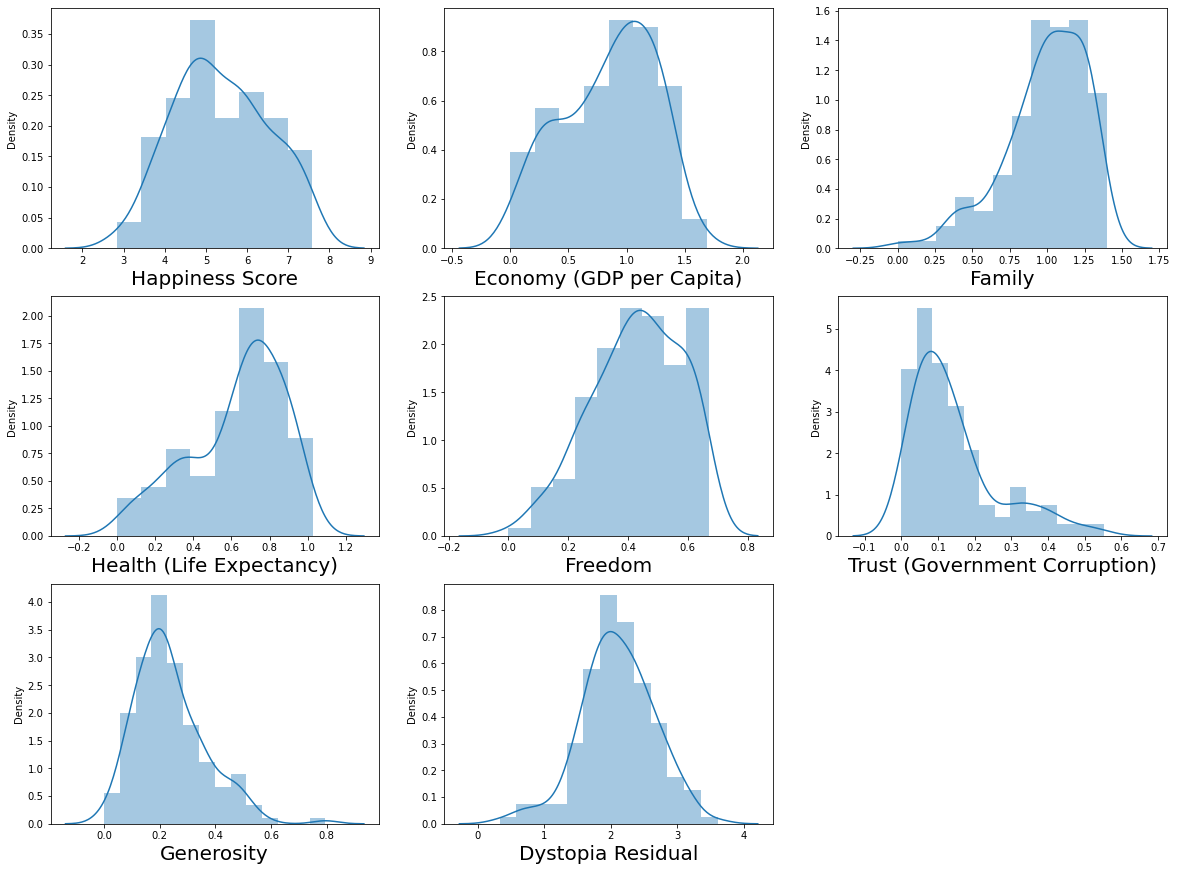

In [19]:

plt.figure(figsize=(20,15))
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize =20 )
        
    plotnumber+=1
    
plt.show()


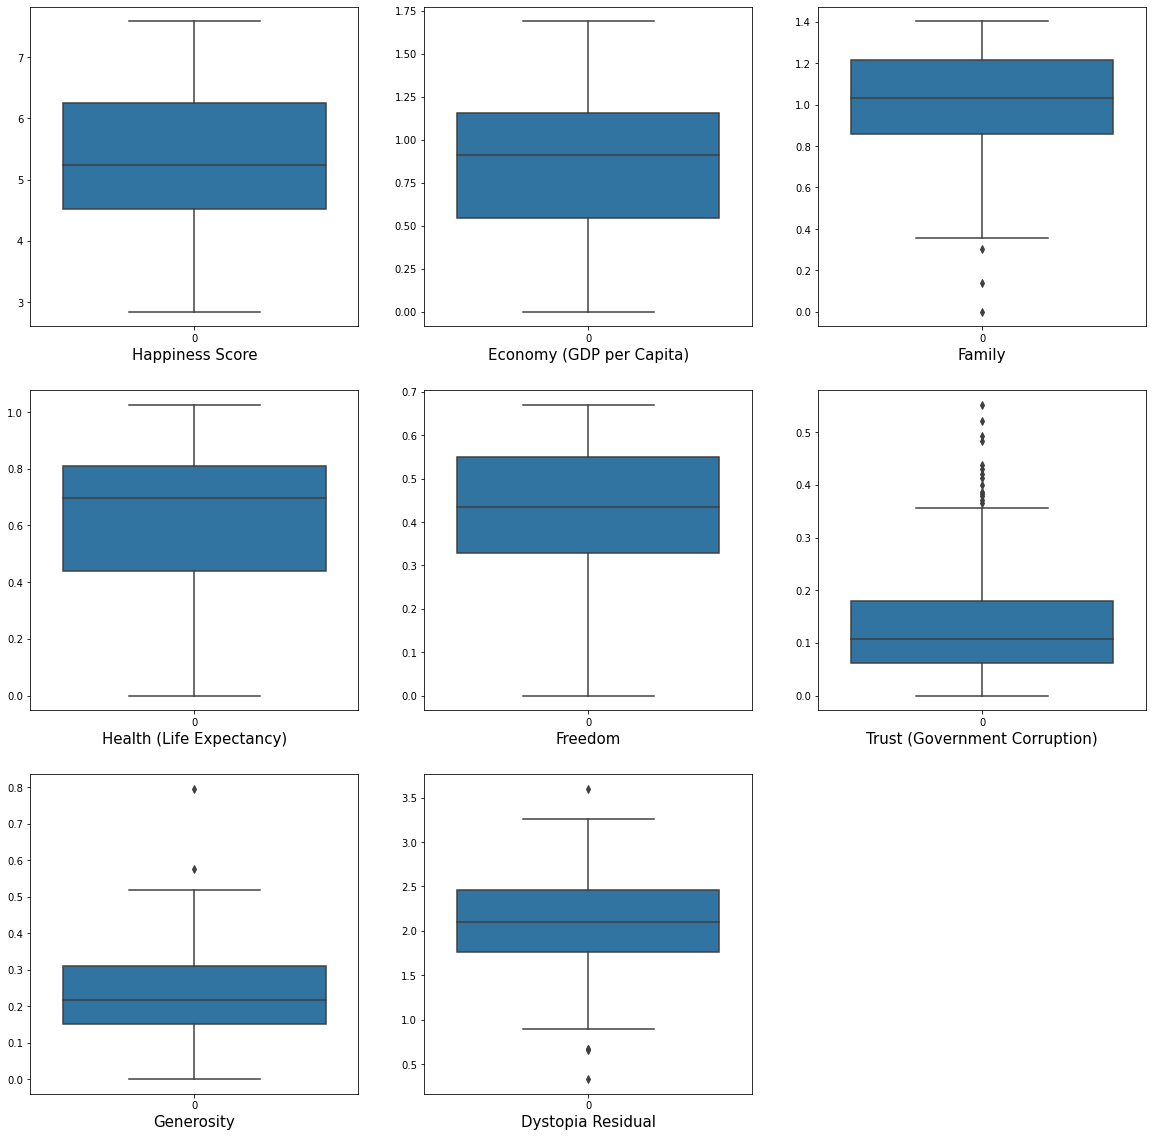

In [20]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in x:
    if graph<=9:
        plt.subplot(3,3, graph)
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [21]:
# It is observed that family , Dystopia Residual,Trust & Generosity having outliers.

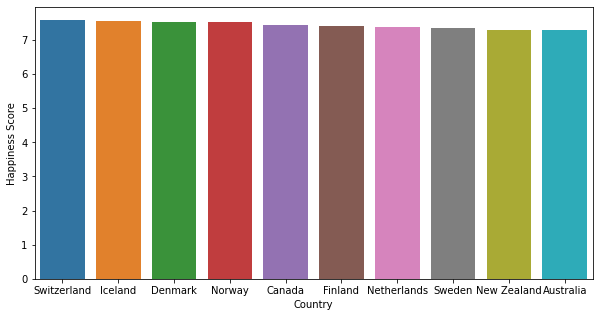

In [22]:
#Finding top 10 countries which is having highest happiness score 

plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Happiness Score",
           data=data.nlargest(10,"Happiness Score"))

plt.show()

In [23]:
#From above Switzerland having highest happiness score followed by iceland & Denmark

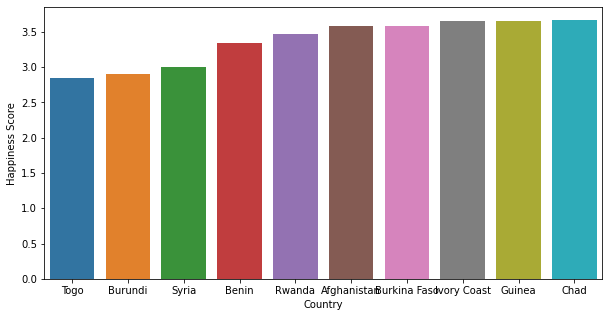

In [24]:
#Finding last 10 countries which is having lowest happiness score 

plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Happiness Score",
           data=data.nsmallest(10,"Happiness Score"))

plt.show()

In [25]:
# Togo is having less happiness score followed by Burundi & Syria.

In [27]:
# Finding correlation between the data

<AxesSubplot:>

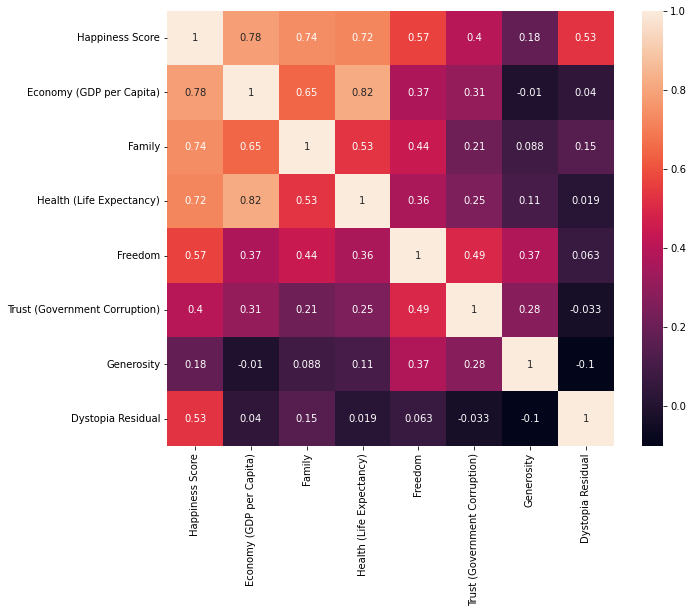

In [28]:
plt.figure(figsize=(10,8))

sns.heatmap(x.corr(), annot=True)

In [89]:
#As per heatmap there is correlation between Happiness score & Economy(GDP per capita):-78%
#Also having 82% correlation between Economy(GDP per capita  Vs Health (Life expanctancy))

In [90]:
# Finding correlation between happiness score & Economy (GDP per capita)

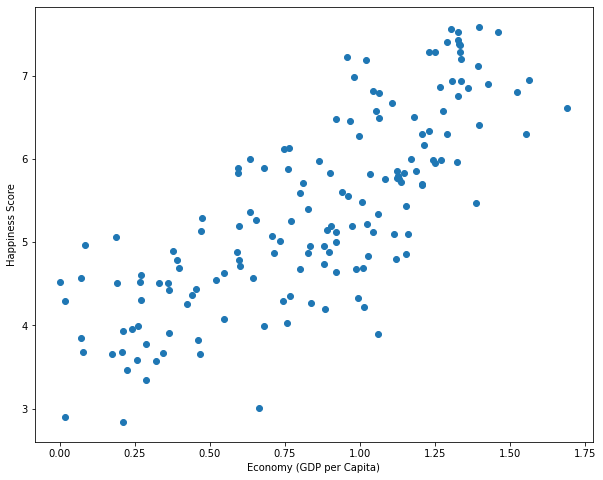

In [278]:
plt.figure(figsize=(10,8))
x=data["Economy (GDP per Capita)"]
y=data["Happiness Score"]

plt.scatter(x,y)
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

In [92]:
# Positive correlation is between Economy (GDP per capita & Happiness Score)

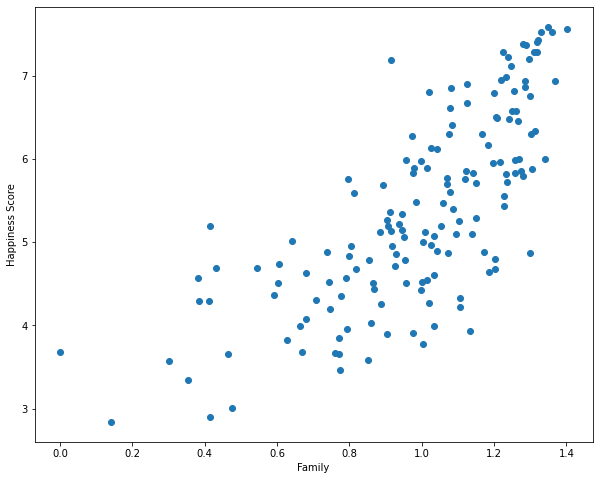

In [26]:
#Finding relationship between Happiness core & family

plt.figure(figsize=(10,8))
x=data["Family"]
y=data["Happiness Score"]

plt.scatter(x,y)
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.show()

In [ ]:
#From above it observed that there is poitive relationship between  family & Happiness score. 
#Score increase w.r. to family

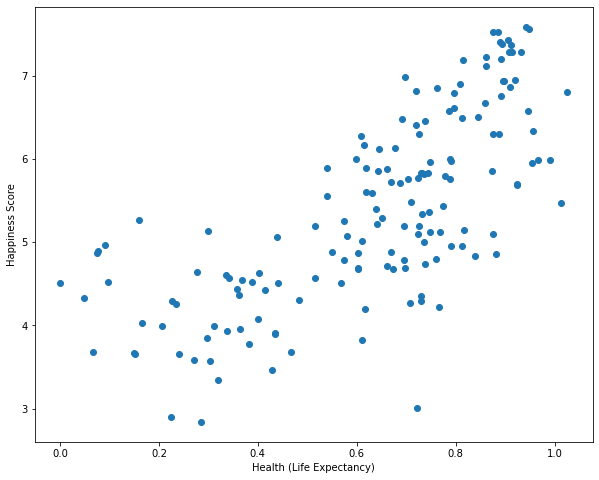

In [29]:
#Finding relatinship between Happiness score Vs Health (life exp)


plt.figure(figsize=(10,8))
x=data["Health (Life Expectancy)"]
y=data["Happiness Score"]

plt.scatter(x,y)
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()



In [30]:
#It shows positive correlation between Health (life expantancy) & happiness score. Happiness score increases with r.to Health.

Text(0.5, 0, 'Happiness Score')

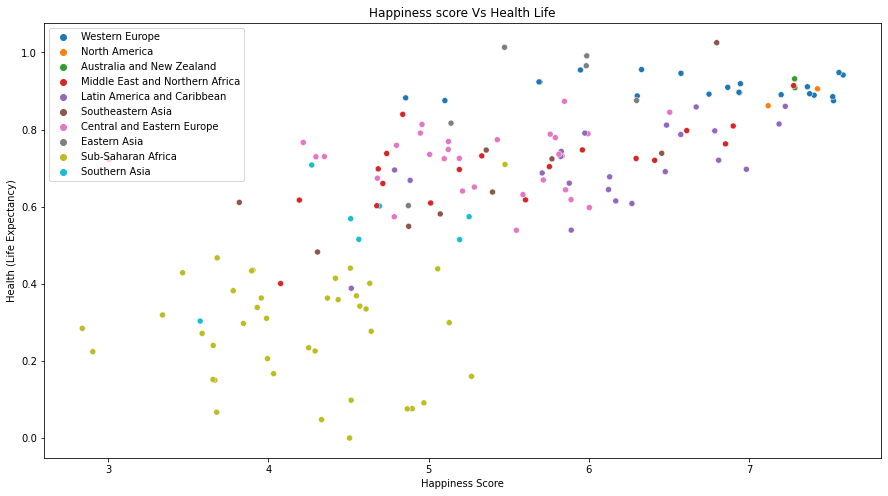

In [77]:
#Finding relatinship between Happiness score Vs Health (life exp)


#plt.rcParams["figure.figsize"]=(20,10)

plt.figure(figsize=(15,8))

plt.title("Happiness score Vs Health Life")
sns.scatterplot(x=data["Happiness Score"], y=data["Health (Life Expectancy)"], hue=data["Region"])
plt.legend(loc="upper left",fontsize="10")




plt.ylabel("Health (Life Expectancy)")
plt.xlabel("Happiness Score")




In [ ]:
#From above it is observed that Western Europe countries having more happiness score w.r. to Health (Life Expectancy).
# Sub saharan Africa having very less happiness score w.r.to health life expectancy


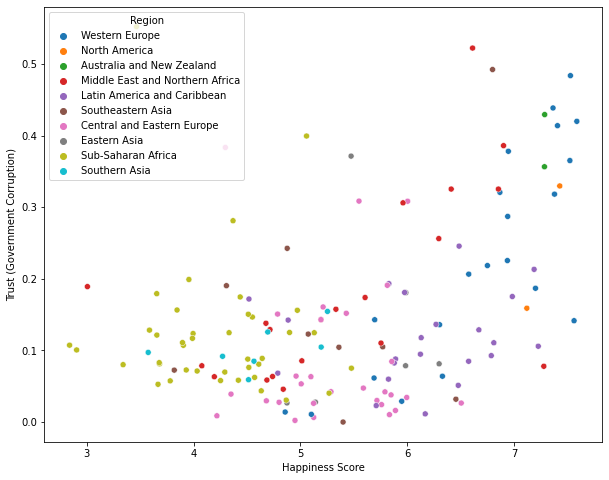

In [82]:
#Finding the relationship between Happiness score & Trust (Government Corruption)


plt.figure(figsize=(10,8))
y=data["Trust (Government Corruption)"]
x=data["Happiness Score"]

sns.scatterplot(x,y, hue=data["Region"])
plt.ylabel("Trust (Government Corruption)")
plt.xlabel("Happiness Score")
plt.show()



In [ ]:
#Happiness score is more when corruption is less.
#Sub saharan Africa having less trust(Government corruption) in that happieness score is also less.
#Central eastern europ is having good happiness score score in between 4.5 to 6.5 w.r. to trust.
#middle east & northen africa having very good happiness score & having highest trust on govt.
#Western europ having high happiness scrore w.r.to trust.

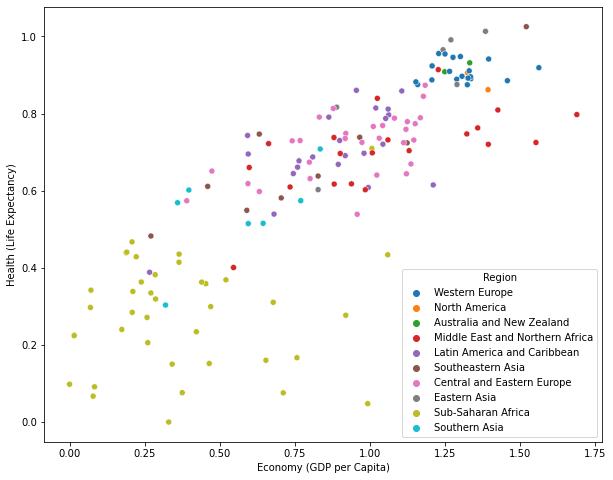

In [31]:
#Finding relationship between Economy(GDP per capita) Vs. Health (Life expanctancy)

plt.figure(figsize=(10,8))
x=data["Economy (GDP per Capita)"]
y=data["Health (Life Expectancy)"]

sns.scatterplot(x,y, hue=data["Region"])
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Health (Life Expectancy)")
plt.show()

In [302]:
# Positive correlation between Economy (GDP per capita) & Health (life Expectancy)
#Sub saharan Africa having less Health (life expectancy) as the Economy (GDP per capita is low).
# Central Eastern europ, latin africa and caribbean having good health (life expectancy).
# Western Europ is having very good health (life expectancy.)

In [32]:
X= data[['Economy (GDP per Capita)',"Family",
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity',"Dystopia Residual"]]
y=data[["Happiness Score"]]


In [33]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=X.columns

vif


,vif,features
0,4.088959,Economy (GDP per Capita)
1,1.944328,Family
2,3.157781,Health (Life Expectancy)
3,1.749104,Freedom
4,1.421872,Trust (Government Corruption)
5,1.289134,Generosity
6,1.049255,Dystopia Residual


In [35]:
# As per VIF there is  no multicolinearity.

In [36]:
x_scaled.shape

(158, 7)

In [39]:
from sklearn.linear_model import LinearRegression
X = data[['Economy (GDP per Capita)',"Family",
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity',"Dystopia Residual"]]
y=data["Happiness Score"]

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred=lm.predict(x_test)
y_pred

array([7.36358096, 5.99510197, 4.63351373, 4.51439201, 5.71590176,
       4.50726531, 4.51232645, 3.95568894, 4.68558699, 5.00704771,
       6.78623724, 3.90377689, 6.66966933, 5.77039758, 5.19382219,
       4.88448926, 4.29672447, 4.87599544, 3.89652195, 5.82827219,
       5.98704907, 6.45462266, 5.79059337, 7.28594408, 6.1676957 ,
       6.29814818, 4.85760837, 6.90131215, 3.81920014, 4.6940268 ,
       5.88903965, 5.84763104, 6.94615692, 4.29254415, 4.19431413,
       6.81026011, 4.97118774, 5.68872771, 4.64233243, 4.95938776])

In [41]:
print(classification_report(y_test, y_pred))

ValueError: continuous is not supported